In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Load the dataset
df = pd.read_csv(r"C:\Users\amani\Documents\Projects\HR Analyitics Dashboard\HR_Analytics.csv")
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [54]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [55]:
df.drop(columns=["EmpID", "EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"], inplace=True)
df["YearsWithCurrManager"].fillna(df["YearsWithCurrManager"].median(), inplace=True)
cat_cols = df.select_dtypes("object").columns
df[cat_cols] = df[cat_cols].astype("category")
df.head()




,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,...,3,4,0,0,0,3,0,0,0,0.0


### Correlation Heatmap

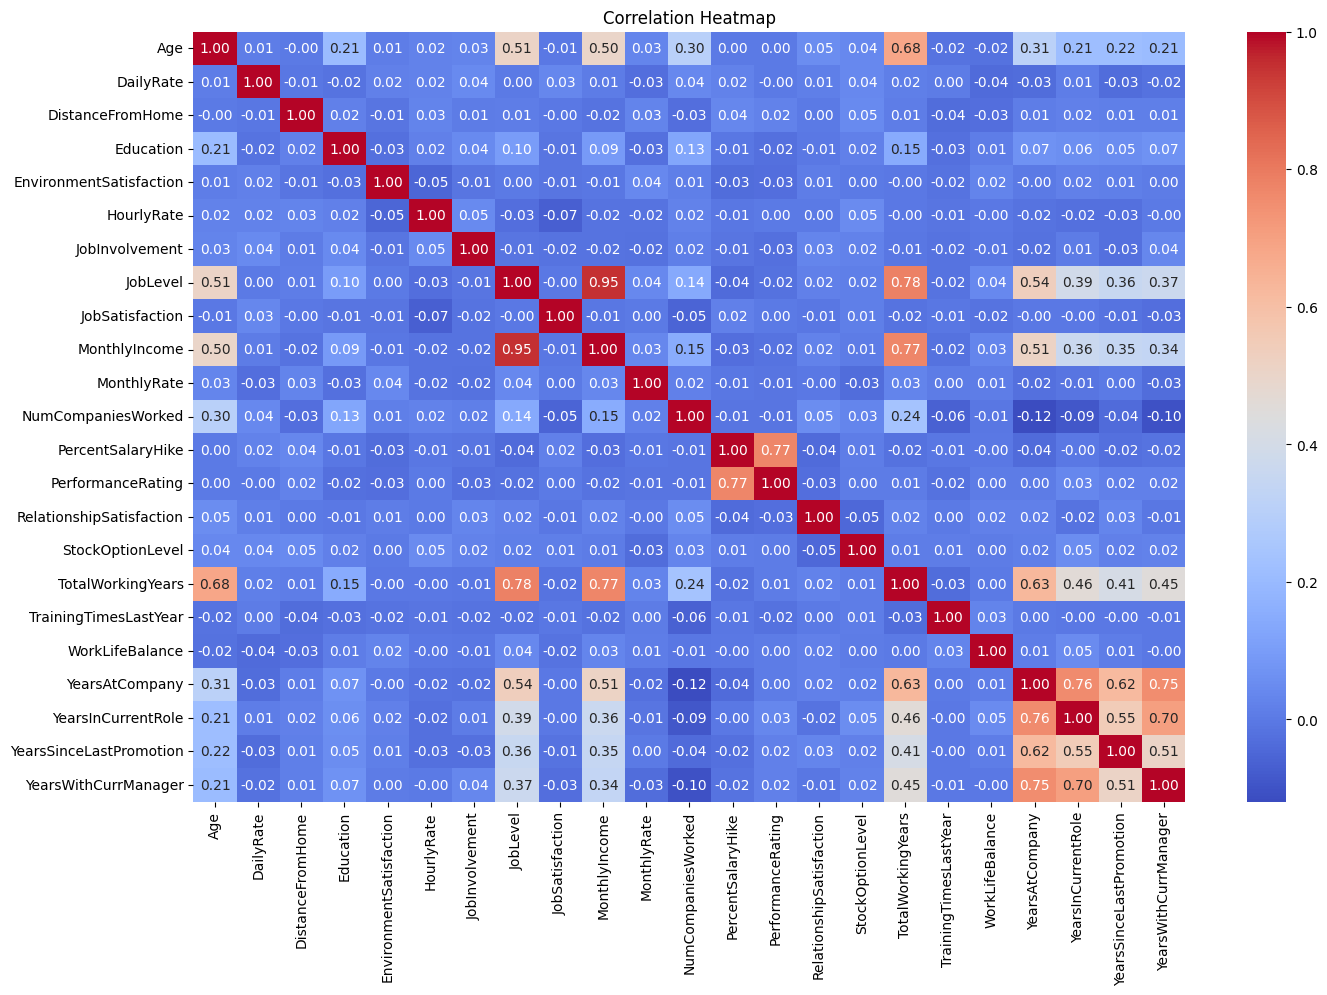

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Attrition Pie Chart

In [57]:
px.pie(df, names= 'Attrition', title = "Attrition Rate").show()

### Attrition by Job Role

In [58]:
px.histogram(df, x="JobRole", color="Attrition", barmode ="group",title = "Attrition by Job Role").show()

### Monthly Income vs Attrition

In [59]:
px.box(df, x='Attrition', y="MonthlyIncome", color="Attrition", title="Monthly Income vs Attrition").show()

#### Overtime vs Attrition

In [60]:
px.histogram(df, x="OverTime", color = "Attrition", barmode="group", title="Overtime vs Attrition").show()

### Work-Life Balance

In [61]:
px.histogram(df, x="WorkLifeBalance", color="Attrition", barmode="group", title="Work-Life Balance vs Attrition").show()


### Years at Company vs Attrition

In [62]:
px.violin(df, y="YearsAtCompany", x="Attrition", color="Attrition", box=True, points="all", title="Years at Company vs Attrition").show()


### Promotion Gap

In [63]:
px.strip(df, x="Attrition", y="YearsSinceLastPromotion", color="Attrition", title="Years Since Last Promotion by Attrition").show()


### Attrition Rate per Department (in %)

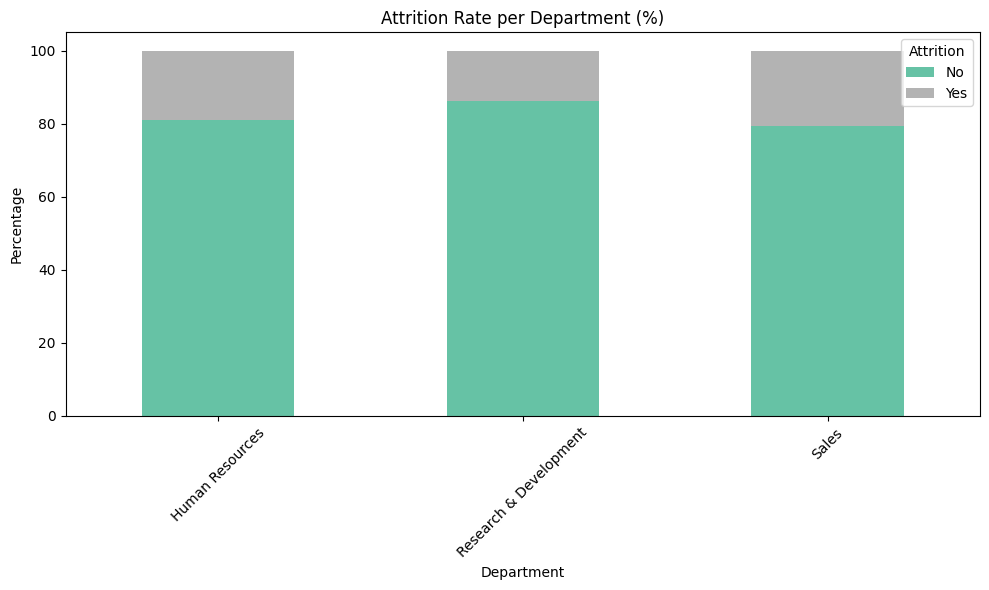

In [64]:
dept_attr = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
dept_attr.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Attrition Rate per Department (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


### Attrition by Distance Frome Home

In [65]:
px.histogram(df, x="DistanceFromHome", color="Attrition", nbins=30, barmode="overlay",
             title="Distance from Home vs Attrition", opacity=0.6).show()


### Satisfaction Scores vs Attrition

In [66]:
satisfaction_cols = ["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]
for col in satisfaction_cols:
    px.histogram(df, x=col, color="Attrition", barmode="group", title=f"{col} vs Attrition").show()


### Years with Cirrent Manager vs Attrition

In [67]:
px.violin(df, y="YearsWithCurrManager", x="Attrition", color="Attrition", box=True,
          title="Years with Current Manager vs Attrition", points="all").show()


### Heatmap of Age Group vs Job Role (Churn Risk)

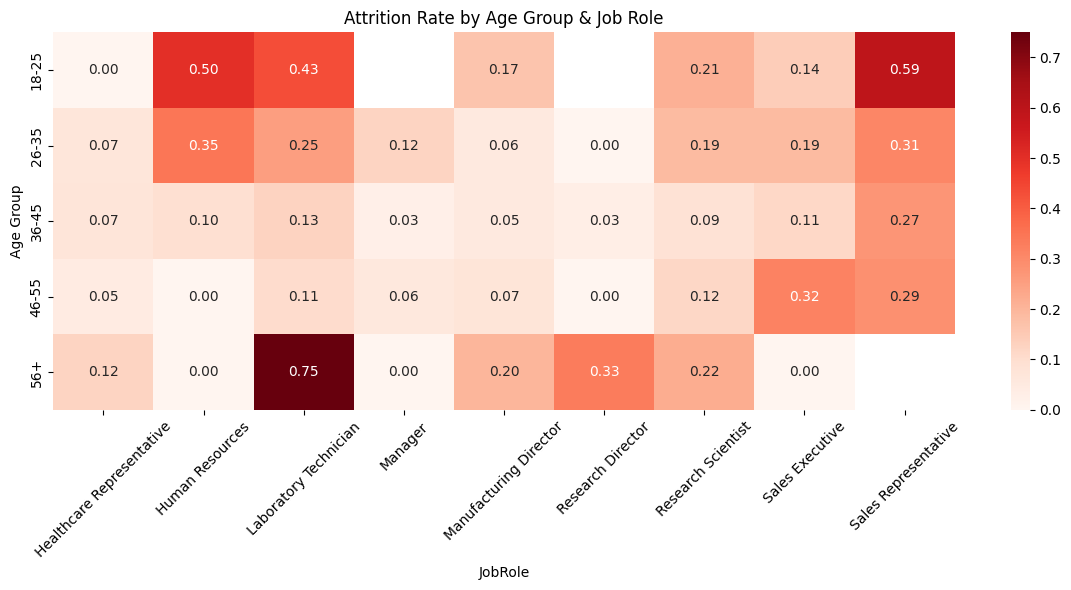

In [68]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[17, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56+"])
pivot_table = pd.crosstab(index=df["AgeGroup"], columns=df["JobRole"], values=df["Attrition"].cat.codes, aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Reds")
plt.title("Attrition Rate by Age Group & Job Role")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Final Observations & Insights

1. **Attrition Concentration**:
   - The overall attrition rate is around **16%–20%**.
   - Attrition is significantly higher among employees in **Sales** and **Human Resources**, especially in **Sales Executive** and **Laboratory Technician** roles.

2. **OverTime is a Red Flag**:
   - Employees who work **OverTime** are far more likely to leave the company.
   - OverTime appears to be a stronger predictor of attrition than department or age.

3. **Income Matters**:
   - Employees with **lower Monthly Income** are more likely to quit.
   - High earners show more stability, especially in technical and R&D roles.

4. **Work-Life Balance and Job Satisfaction**:
   - Poor **Work-Life Balance** (rated 1 or 2) is heavily associated with attrition.
   - **Environment Satisfaction** and **Relationship Satisfaction** below average show noticeable increases in attrition rate.

5. **Managerial Relationships**:
   - Attrition decreases as the number of **Years with Current Manager** increases.
   - Employees with **less than 1 year** under the same manager are most at risk.

6. **Promotion and Career Progression**:
   - Those who haven’t been promoted in the **last 2+ years** show higher attrition.
   - A long **stagnation period** (Years Since Last Promotion > 4) increases the likelihood of leaving.

7. **Distance from Home**:
   - Employees living **15+ km away** from work tend to leave more often, especially in roles with overtime.

8. **Demographic Factors**:
   - **Younger employees (18–35)** show higher attrition than older ones.
   - **Unmarried employees** and those with **lower education levels** tend to churn more frequently.

9. **Heatmap Insights**:
   - The **36–45** age group in **Sales and Lab Tech** roles has the **highest risk** of attrition.
   - The **lowest attrition** is seen in **older professionals** in **technical consultant** roles.

10. **Cumulative Risk Indicators**:
    - Employees facing 3 or more of the following tend to leave: OverTime, low income, poor satisfaction, low promotion history, far commute.

